Extension to the 538 Riddler from March 11, 2016: http://fivethirtyeight.com/features/should-you-shoot-free-throws-underhand/

Instead of setting the variance in the x direction to zero, let σ<sub>X</sub><sup>2</sup> + σ<sub>Y</sub><sup>2</sup> = C be fixed, and let α = σ<sub>X</sub><sup>2</sup> / σ<sub>Y</sub><sup>2</sup> vary between 0 and 1. Is the probability of making the free throw always higher for α < 1? What's the maximum value?

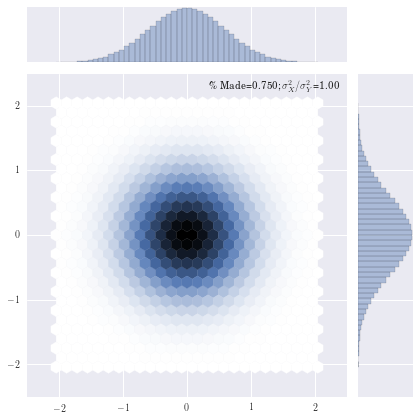

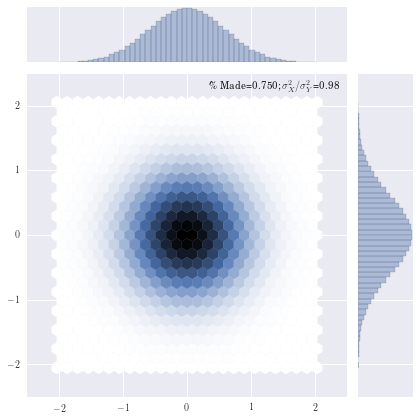

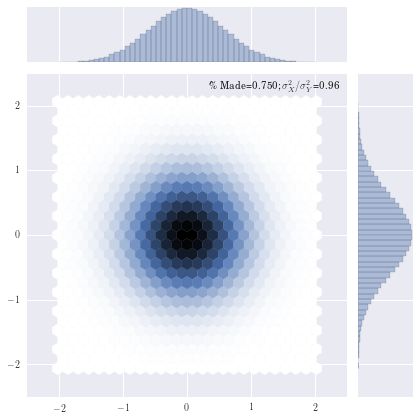

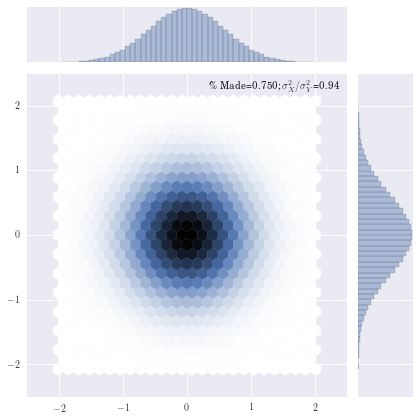

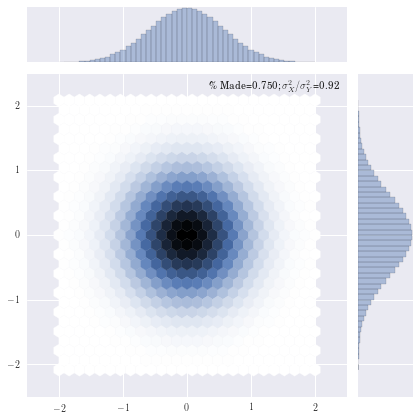

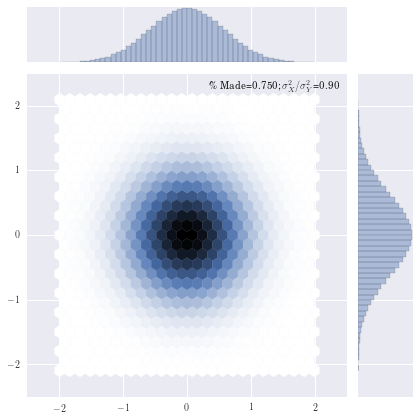

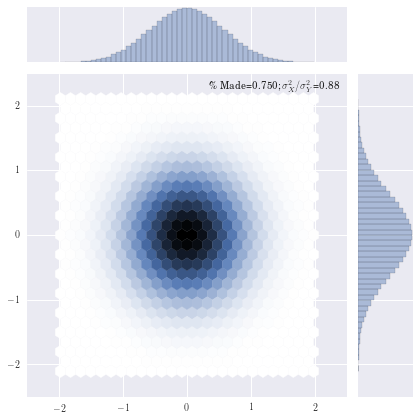

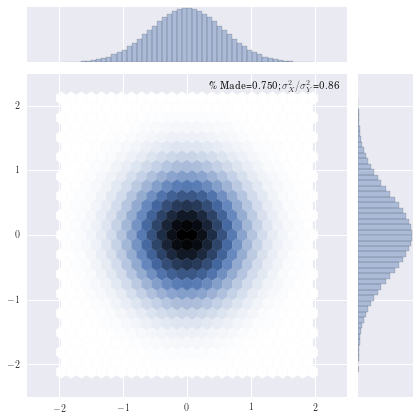

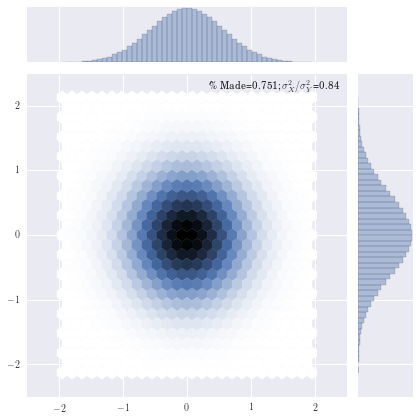

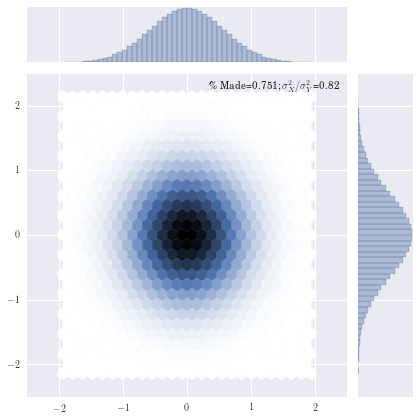

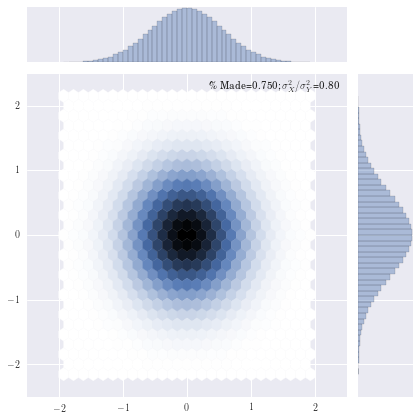

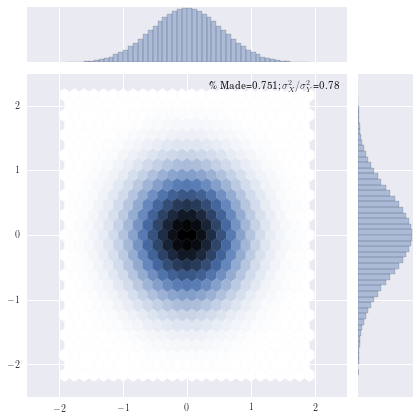

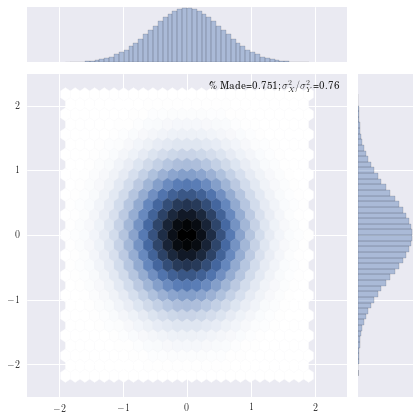

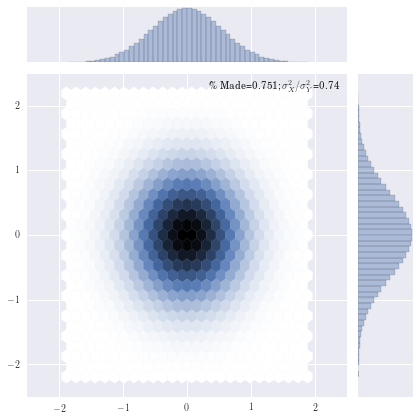

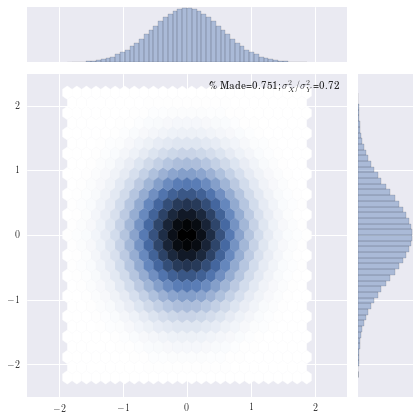

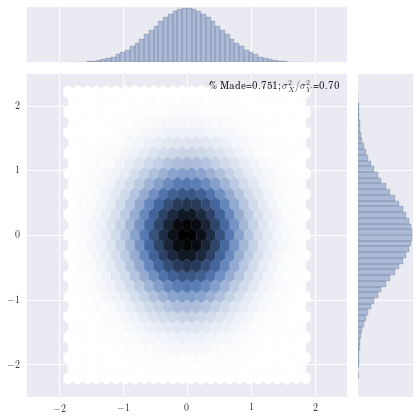

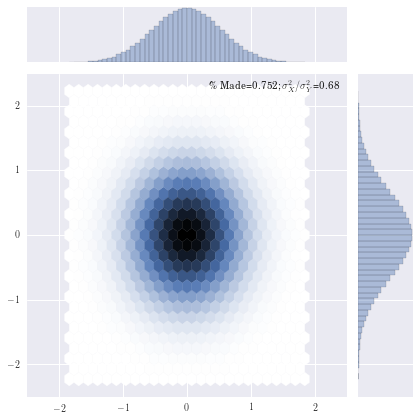

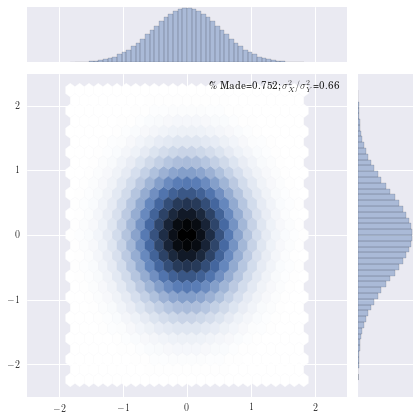

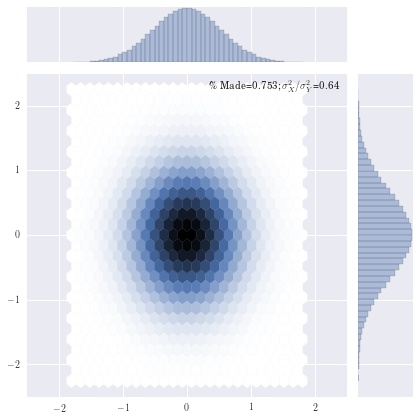

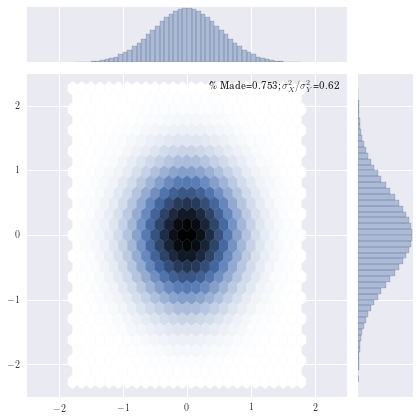

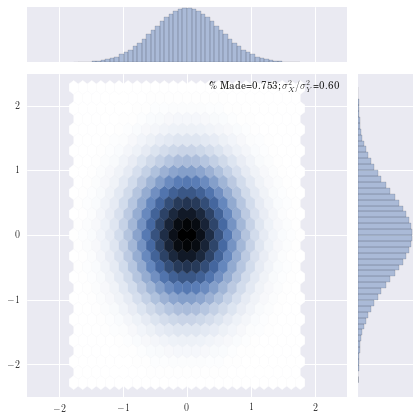

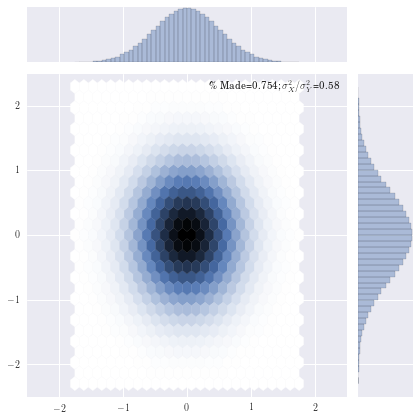

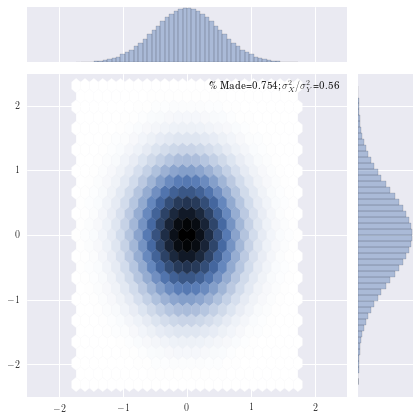

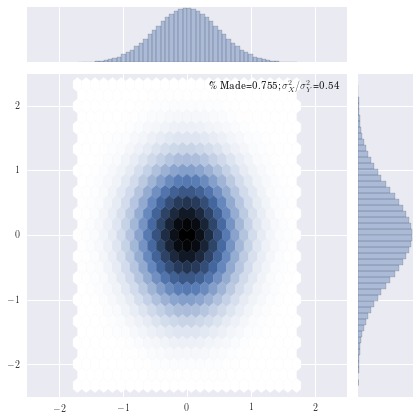

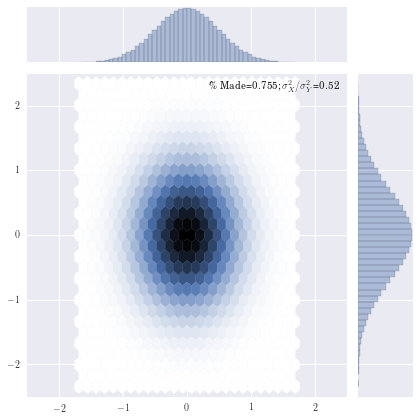

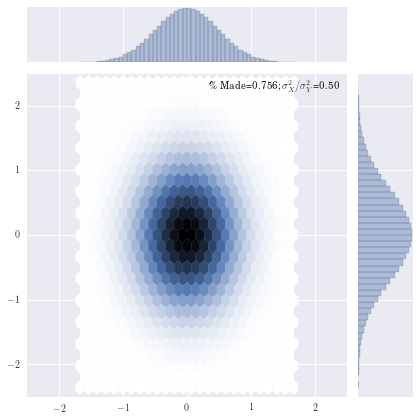

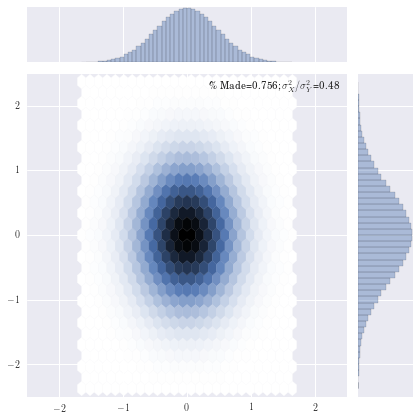

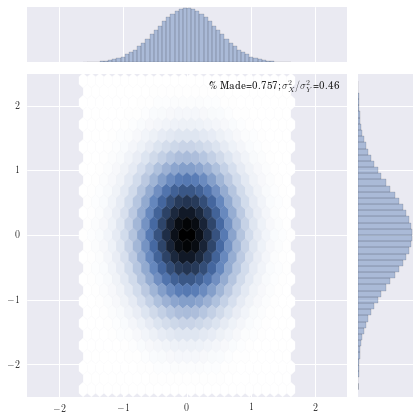

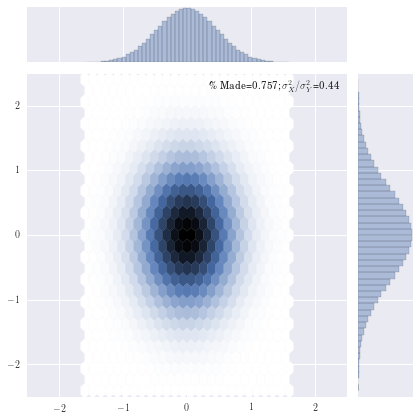

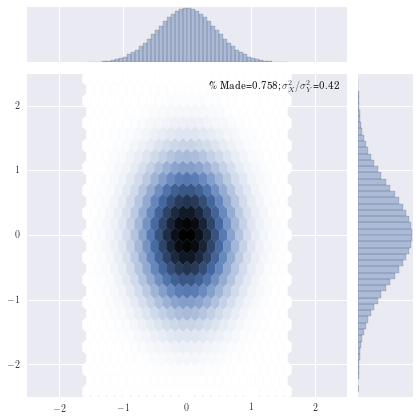

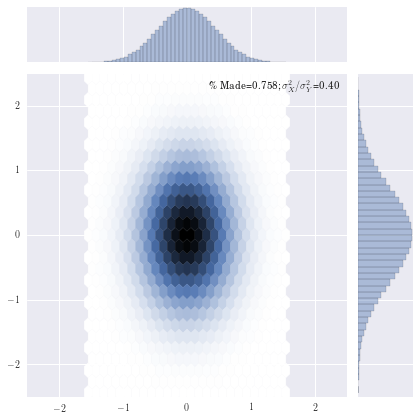

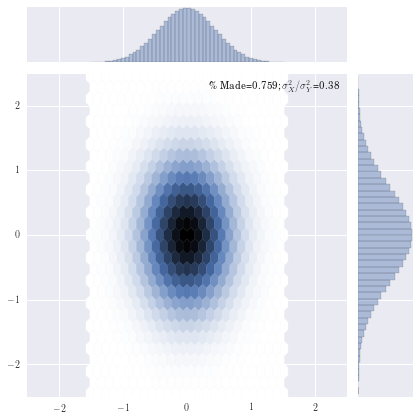

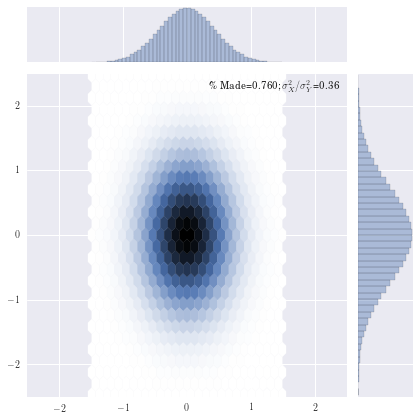

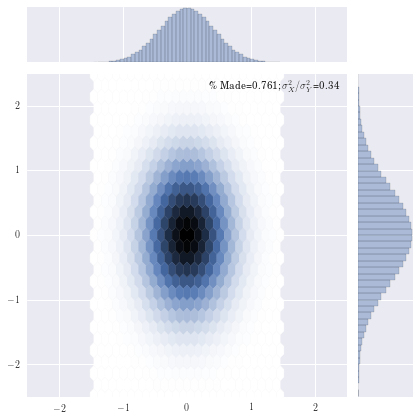

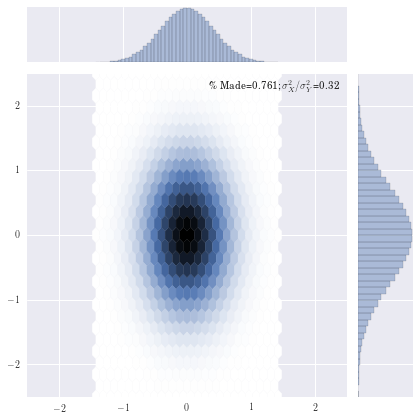

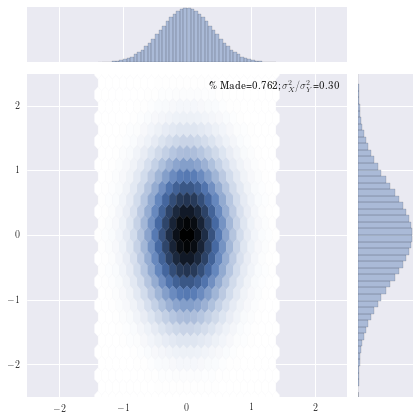

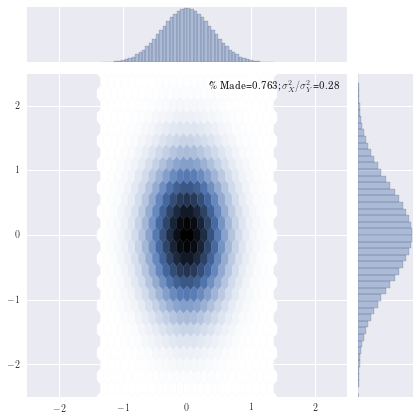

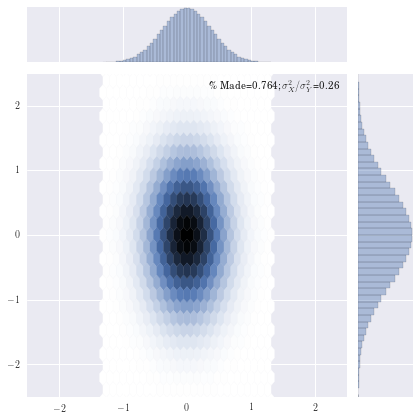

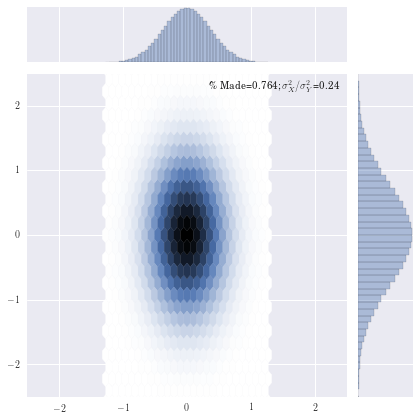

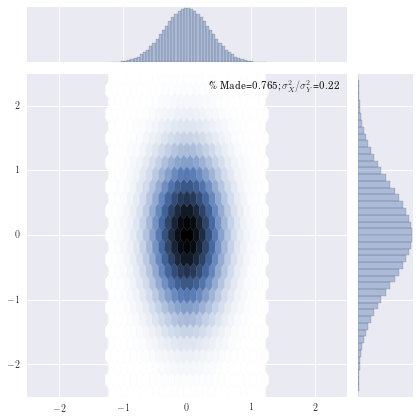

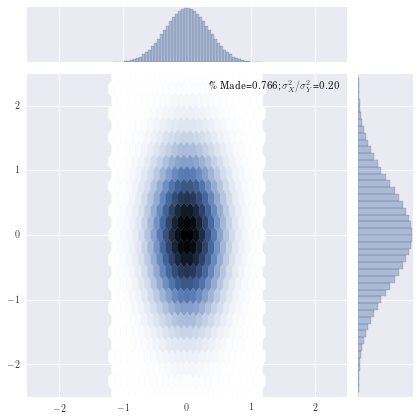

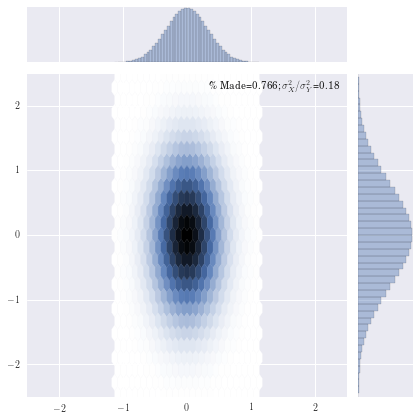

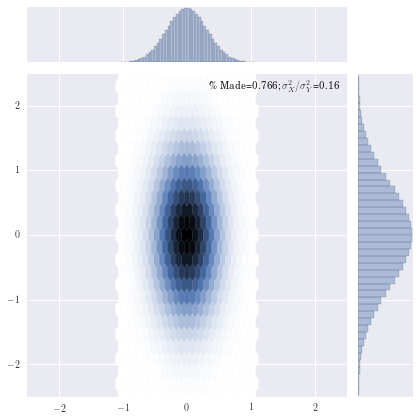

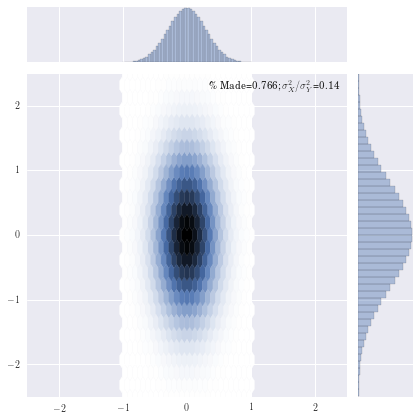

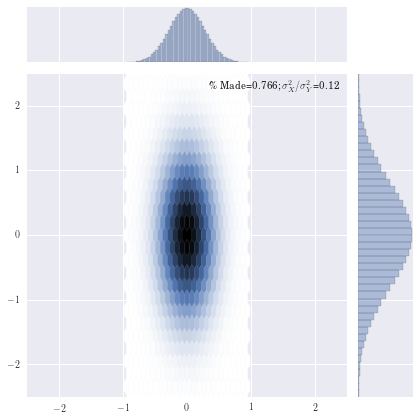

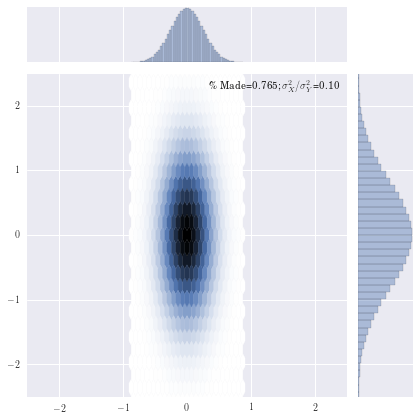

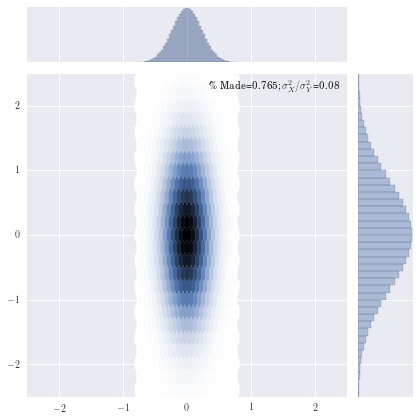

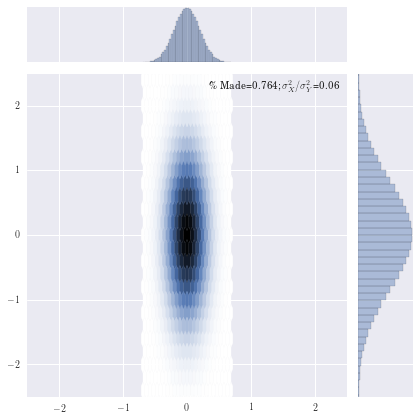

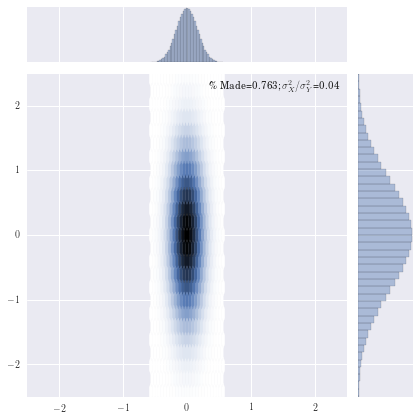

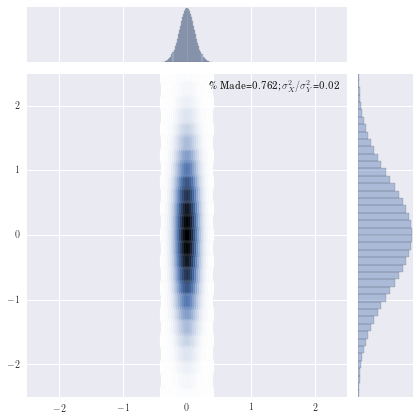

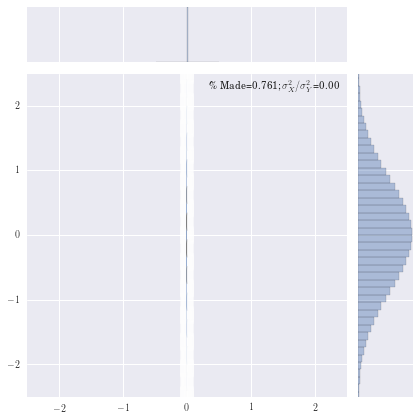

In [1]:
%matplotlib inline
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
from matplotlib import animation
import seaborn as sns

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

N = 3 * 10 ** 3                 #  gridpoints for hexbin plot
N_mc = 10 ** 7                  #  MC samples for computing % made
α_range = np.linspace(1, 0, 51) #  ratios \sigma_X / \sigma_Y

for i, α in enumerate(α_range):
    # Sample deterministically from normal quantile function to reduce noise when plotting
    C = 1 / (2 * np.log(2)) # C = \sigma_X^2 + \sigma_Y^2 for initial 75% case
    q = scipy.stats.norm.ppf(np.linspace(0, 1, N + 2)[1:-1])
    x = np.repeat(q, N) * np.sqrt(α * C / (1 + α))
    y = np.tile(q, N) * np.sqrt(C / (1 + α))
    
    # The above values are slightly biased so it's better to use MC for computing the % made
    x_mc = np.random.normal(size=N_mc) * np.sqrt(α * C / (1 + α))
    y_mc = np.random.normal(size=N_mc) * np.sqrt(C / (1 + α))
    g = sns.jointplot(x, y, kind='hexbin', stat_func=None, xlim=(-2.5, 2.5), ylim=(-2.5, 2.5),
                      joint_kws=dict(gridsize=25))
    g.annotate(func=lambda x, y: (np.mean(x_mc ** 2 + y_mc ** 2 <= 1), α), stat='\% Made',
               template='{stat}={val:0.3f}; $\sigma_X^2 / \sigma_Y^2$={p:0.2f}')
    plt.savefig('free_throw{i:03d}.png'.format(i=i))
    plt.savefig('free_throw{i:03d}.png'.format(i=2 * len(α_range) - (i + 1)))
    plt.show()

The probability is lowest for the non-granny shot σ<sub>X</sub><sup>2</sup> = σ<sub>Y</sub><sup>2</sup>, and peaks around σ<sub>X</sub><sup>2</sup> = σ<sub>Y</sub><sup>2</sup> / 7 at 76.6%.

Exact(ish) answer from Mathematica:
```
In[1]:= c = 1 / (2 * Log[2])
In[2]:= sX = Sqrt[a * c / (1 + a)]
In[3]:= sY = Sqrt[c / (1 + a)]
In[4]:= f = PDF[MultinormalDistribution[{0, 0}, {{sX^2, 0}, {0, sY^2}}], {x, y}]
In[5]:= NMaximize[{NIntegrate[f,  {x, -1, 1}, {y, -Sqrt[1 - x^2], Sqrt[1 - x^2]}], 0 < a < 1}, a]
Out[5]= {0.766207, {a -> 0.144422}}
```
What's special about `α=0.1444`...?

Video from images using `ffmpeg`: https://trac.ffmpeg.org/wiki/Create%20a%20video%20slideshow%20from%20images

In [2]:
!ffmpeg -framerate 8 -i free_throw%03d.png -y -c:v libx264 -r 30 -pix_fmt yuv420p free_throw.mp4

ffmpeg version 2.8 Copyright (c) 2000-2015 the FFmpeg developers
  built with Apple LLVM version 6.1.0 (clang-602.0.53) (based on LLVM 3.6.0svn)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/2.8 --enable-shared --enable-pthreads --enable-gpl --enable-version3 --enable-hardcoded-tables --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-opencl --enable-libx264 --enable-libmp3lame --enable-libvo-aacenc --enable-libxvid --enable-vda
  libavutil      54. 31.100 / 54. 31.100
  libavcodec     56. 60.100 / 56. 60.100
  libavformat    56. 40.101 / 56. 40.101
  libavdevice    56.  4.100 / 56.  4.100
  libavfilter     5. 40.101 /  5. 40.101
  libavresample   2.  1.  0 /  2.  1.  0
  libswscale      3.  1.101 /  3.  1.101
  libswresample   1.  2.101 /  1.  2.101
  libpostproc    53.  3.100 / 53.  3.100
Input #0, image2, from 'free_throw%03d.png':
  Duration: 00:00:12.75, start: 0.000000, bitrate: N/A
    Stream #0:0: Video: png, rgba(pc), 432x432 [SAR 2834:2834 DAR 1:1], 8

GIF from video using `ffmpeg`: http://blog.pkh.me/p/21-high-quality-gif-with-ffmpeg.html#usage

In [3]:
from IPython.display import HTML

!ffmpeg -v warning -i free_throw.mp4 -vf "fps=15,scale=320:-1:flags=lanczos,palettegen" -y /tmp/palette.png
!ffmpeg -v warning -i free_throw.mp4 -i /tmp/palette.png -lavfi "fps=15,scale=320:-1:flags=lanczos [x]; [x][1:v] paletteuse" -y free_throw.gif
HTML("""<img src="free_throw.gif">""")

[Parsed_palettegen_2 @ 0x7fae4bd006c0] Dupped color: FFEAE8F1
[Parsed_palettegen_2 @ 0x7fae4bd006c0] Dupped color: FFFDFCFD
[Parsed_palettegen_2 @ 0x7fae4bd006c0] Dupped color: FFFFFDFF
